In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def modified_lsm(input):

    Ne = 800 # Excitatory neurons
    Ni = 200 # Inhibitory neurons
    re = np.random.rand(Ne)
    ri = np.random.rand(Ni)
    a = np.concatenate((0.02*np.ones(Ne), 0.02+0.08*ri))
    b = np.concatenate((0.2*np.ones(Ne), 0.25-0.05*ri))
    c = np.concatenate((-65+15*re**2, -65*np.ones(Ni)))
    d = np.concatenate((8-6*re**2, 2*np.ones(Ni)))

    # scaling of input connections
    win_e = 5
    win_i = 2
    U = np.concatenate((win_e*np.ones(Ne), win_i*np.ones(Ni)))

    # scaling of recurrent connections
    w_e = 0.5
    w_i = 1
    S = np.concatenate((w_e*np.random.rand(Ne+Ni, Ne), -w_i*np.random.rand(Ne+Ni, Ni)), axis=1)

    v = -65*np.ones(Ne+Ni)  # Initial values of v
    u = b*v  # Initial values of u
    firings = []  # spike timings
    states = []  # here we construct the matrix of reservoir states

    for t in range(len(input)):  # simulation of 1000 ms
        # we don't need random thalamic input:
        # I = np.concatenate((5*np.random.randn(Ne), 2*np.random.randn(Ni)))  # thalamic input
        # we use instead the input from the external time series!
        I = input[t] * U
        fired = np.where(v >= 30)[0]  # indices of spikes
        firings.append(np.column_stack((t+np.zeros_like(fired), fired)))
        v[fired] = c[fired]
        u[fired] = u[fired] + d[fired]
        I = I + np.sum(S[:, fired], axis=1)
        v = v + 0.5*(0.04*v**2 + 5*v + 140 - u + I)  # step 0.5 ms
        v = v + 0.5*(0.04*v**2 + 5*v + 140 - u + I)  # for numerical stability
        u = u + a*(b*v - u)
        states.append(v >= 30)

    firings = np.concatenate(firings)
    plt.plot(firings[:, 0], firings[:, 1], '.')

    # in the end states is 1000 x number of time steps
    return states, firings

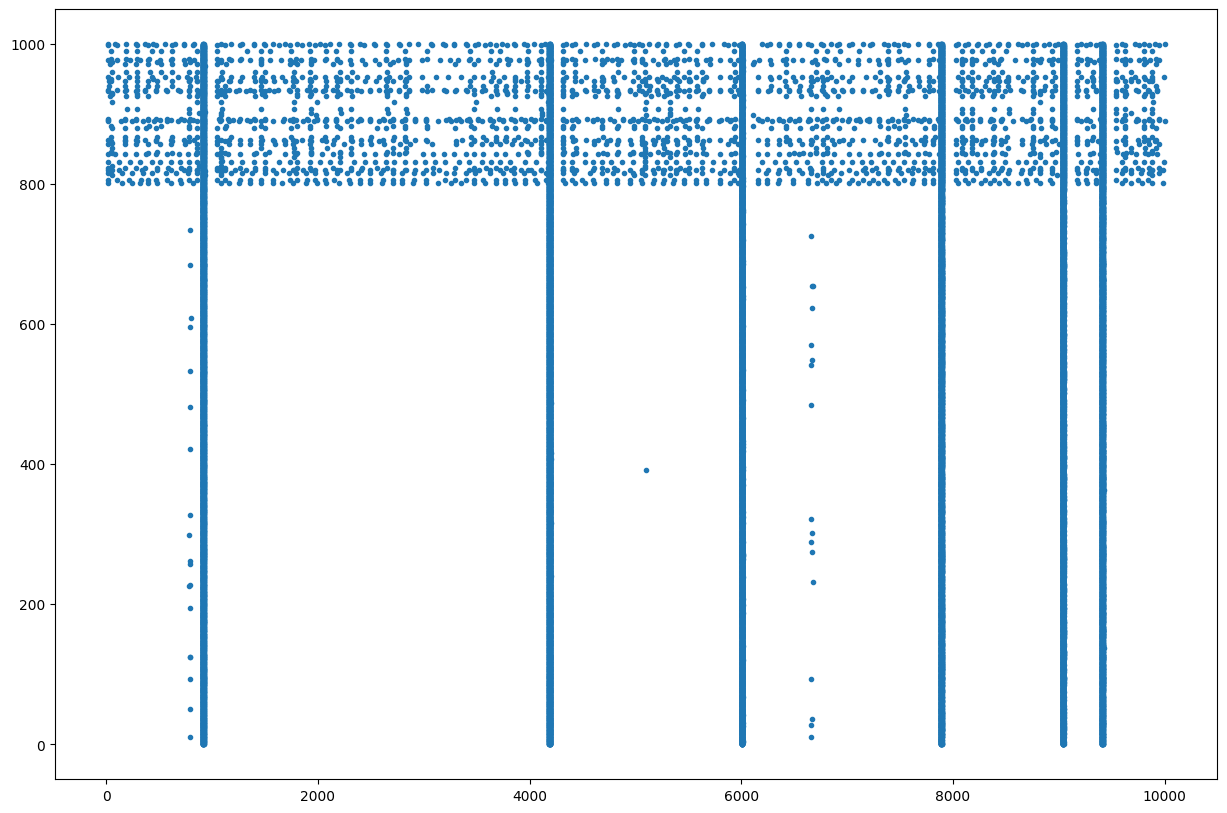

In [ ]:
plt.figure(figsize=[15,10])
input_data = np.random.rand(10000)  # Replace with your input data
states, firings = modified_lsm(input_data)